In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from keras.datasets import mnist

In [3]:
## Loading the data

(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
#x_train=x_train.reshape(60000,28,28,1)

In [7]:
#x_train.shape

In [8]:
## Data Type

print(x_train.dtype)

uint8


In [9]:
## Conversion

x_train = x_train.astype(np.float16)
x_test  = x_test.astype(np.float16)

In [10]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(x_train.ndim)

3


In [12]:
print(y_train.shape)

(60000,)


In [13]:
print(x_test.shape)

(10000, 28, 28)


In [14]:
print(y_test.shape)

(10000,)


In [15]:
## We notice that a given pixel brightness is in the scale 0-255 (grayscale).
## Therefore, we will need to re-scale x_train and y_train (put in scale 0-1).

In [16]:
## Normalise x_train and x_test

x_train=x_train/255
x_test=x_test/255

In [17]:
x_train[1,5]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1882, 0.933 ,
       0.9883, 0.9883, 0.9883, 0.929 , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ], dtype=float16)

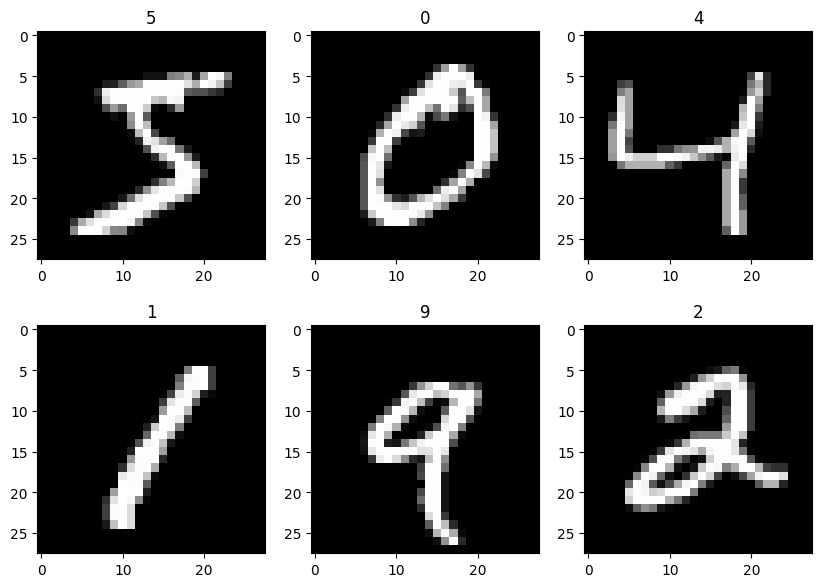

In [18]:
## Visualise a Dataset sample
plt.figure(figsize=(10,7))

for i in range (6):

    
    plt.subplot(2,3,i+1)
   
    plt.imshow(x_train[i], cmap='gray')
  
    plt.title(str(y_train[i]))


In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [20]:
## Reshape x_train and x_test

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [21]:
print('x_train shape is :', x_train.shape)
print('x_train dimension is:', x_train.ndim)

x_train shape is : (60000, 28, 28, 1)
x_train dimension is: 4


In [22]:
x_train[1,27,27]

array([0.], dtype=float16)

In [24]:
## Define the CNN Model
model=Sequential()
#input_shape=(1,28,28,)

##First layer
model.add(Conv2D(16,kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))

model.summary()
##Layers
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.summary()
model.add(Dense(32, activation='relu'))
##Output layer
model.add(Dense(10, activation='softmax'))


## compiling the ANN

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es=EarlyStopping( monitor='val_loss',patience=200,verbose=1,mode=min)
mc=ModelCheckpoint('best_m.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                      

In [25]:
## train the model   

history= model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2,callbacks=[es,mc])

Epoch 1/20
750/750 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.9037
Epoch 1: val_accuracy improved from -inf to 0.97325, saving model to best_m.h5
750/750 [==============================] - 18s 22ms/step - loss: 0.3091 - accuracy: 0.9037 - val_loss: 0.0932 - val_accuracy: 0.9732
Epoch 2/20
750/750 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9675
Epoch 2: val_accuracy improved from 0.97325 to 0.97742, saving model to best_m.h5
750/750 [==============================] - 16s 21ms/step - loss: 0.1067 - accuracy: 0.9675 - val_loss: 0.0693 - val_accuracy: 0.9774
Epoch 3/20
749/750 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9749
Epoch 3: val_accuracy improved from 0.97742 to 0.98500, saving model to best_m.h5
750/750 [==============================] - 16s 21ms/step - loss: 0.0815 - accuracy: 0.9749 - val_loss: 0.0538 - val_accuracy: 0.9850
Epoch 4/20
748/750 [============================>.] - ETA: 0s - loss: 

In [26]:
## make prediction

y_pred_cnn= model.predict(x_test)
#y_pred_cnn=pd.DataFrame(y_pred_cnn)

y_pred_cnn

313/313 [==============================] - 1s 4ms/step


array([[3.08460126e-13, 7.28695316e-13, 2.97456442e-08, ...,
        9.99996662e-01, 5.89539795e-08, 2.60090019e-06],
       [3.17448268e-09, 4.78627527e-10, 9.99999762e-01, ...,
        1.03978394e-07, 3.95948205e-12, 3.72486025e-14],
       [1.65989249e-07, 9.99854684e-01, 3.39006448e-07, ...,
        2.50320045e-05, 8.79097388e-06, 6.64661144e-08],
       ...,
       [2.12685374e-20, 5.40029957e-12, 2.15502673e-15, ...,
        3.64456798e-11, 7.31439243e-10, 1.26657502e-08],
       [1.20943802e-11, 1.99348092e-16, 1.87495388e-16, ...,
        3.98410715e-19, 2.47121847e-04, 9.14971224e-12],
       [3.87717236e-08, 5.62415012e-15, 3.70888237e-10, ...,
        2.51565675e-17, 1.39493569e-10, 7.44224560e-13]], dtype=float32)

In [27]:
y_pred_cnn.shape


(10000, 10)

In [28]:
for i in range(len(y_pred_cnn)):
      y_pred= np.argwhere(y_pred_cnn==np.amax(y_pred_cnn,1,keepdims=True))

In [29]:
print(y_pred)

[[   0    7]
 [   1    2]
 [   2    1]
 ...
 [9997    4]
 [9998    5]
 [9999    6]]


In [30]:
## y_test is a one dimensional array
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000, 2)


In [31]:

#Reshape y_pred

y_prediction=y_pred[:,1]
y_prediction.shape


(10000,)

In [32]:
pd.DataFrame({'Actual': y_test,'Predicted': y_prediction})

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [34]:
## Classification report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
## Confusion matrix
cm=confusion_matrix(y_test, y_prediction)
cm

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1121,    1,    3,    0,    1,    5,    3,    1,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1002,    0,    3,    0,    1,    1,    2],
       [   0,    0,    0,    0,  967,    0,    3,    1,    2,    9],
       [   2,    0,    0,    5,    0,  878,    4,    0,    0,    3],
       [   3,    1,    0,    0,    1,    2,  951,    0,    0,    0],
       [   0,    0,    6,    1,    0,    0,    0, 1016,    1,    4],
       [   2,    0,    3,    1,    0,    1,    0,    0,  963,    4],
       [   0,    0,    0,    0,    2,    1,    0,    1,    0, 1005]],
      dtype=int64)

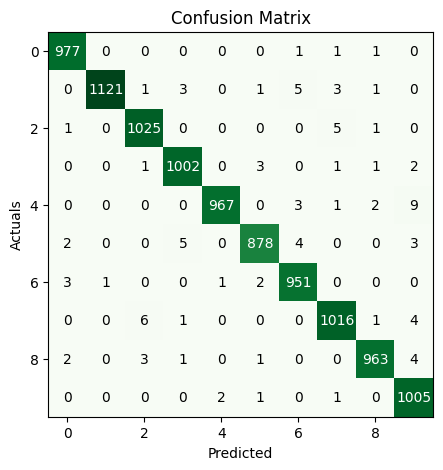

In [36]:
## plot the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax= plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix')
plt.show()

In [37]:
y_test.shape
y_prediction.shape

(10000,)

In [39]:
# Binarise y_test and y_prediction
from sklearn.preprocessing import label_binarize
labels = [0, 1, 2, 3, 4,5,6,7,8,9]

y_test = label_binarize(y_test, classes=labels)
y_prediction = label_binarize(y_prediction, classes=labels)


In [40]:
auc = roc_auc_score(y_test, y_prediction,average='macro',multi_class='ovo')
print('AUC: %f' %auc)

AUC: 0.994707


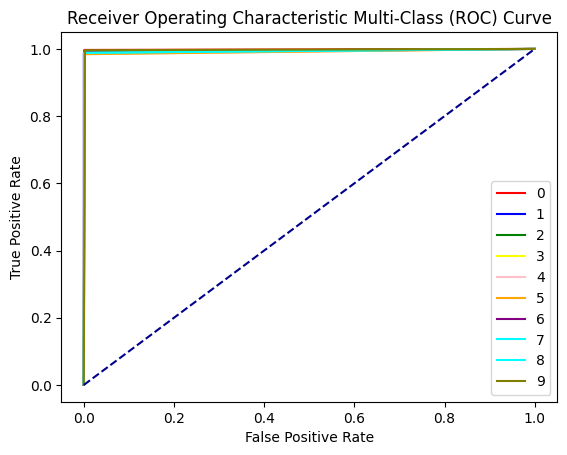

In [81]:
fpr_list = dict()
tpr_list = dict()
threshold_list = dict()
roc_auc_list = dict()
colours=['red','blue','green','yellow','pink','orange','purple','aqua','cian','olive']

for i in range(10): 
    fpr_list[i], tpr_list[i], threshold_list[i] = roc_curve(y_test[:, i], y_prediction[:, i])
    colours=['red','blue','green','yellow','pink','orange','purple','aqua','cyan','olive']
    
    plt.plot(fpr_list[i],tpr_list[i], color=colours[i],label=i )
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Multi-Class (ROC) Curve')
plt.legend()
plt.show()

    

In [44]:
## save the CNN model
model.save('model_cnn')

INFO:tensorflow:Assets written to: model_cnn\assets


INFO:tensorflow:Assets written to: model_cnn\assets
